## Lab 1: Working with IQ data in Python
follownig this lab sheet: http://witestlab.poly.edu/~ffund/el9043/labs/lab1.html

In [12]:
# includes core parts of numpy, matplotlib
import matplotlib.pyplot as plt
import numpy as np
# include scipy's signal processing functions
import scipy.signal as signal
filename = './scan_00_c313M_s8M.iq'
fm_stx_969 = './fm_969_204800.iq'
fm_test = './fm_1025_204800.cu32'
center_freq = 102.5e6
lab1_file = './rtl_f1025_s2.048M.cu32'  #./iqsamples.float32'
lab1_samp = 2048000
lab1_center = 102.5e6

# samp_rate = 2048000 # for hackrf based data 
samp_rate = 2048000 # for rtl_based data 
# samp_rate = 

# https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
# !wget https://gitlab.com/jumson/pinode_notes/raw/master/working_more/Drone_Recording.m4a
file = './Drone_Recording.m4a'
file_samp = 48000

practice reading in complex values stored in a file
Read in data that has been stored as raw I/Q interleaved 32-bit float samples

In [38]:
olddat = np.fromfile(file, dtype="uint8")
olddat
dat = olddat
dat

array([ 0,  0,  0, ..., 46, 49, 41], dtype=uint8)

In [34]:
mydat = np.fromfile(lab1_file, dtype="complex64")
dat = mydat
dat

FileNotFoundError: [Errno 2] No such file or directory: './rtl_f1025_s2.048M.cu32'

Look at the data. Is it complex?

Turn the interleaved I and Q samples into complex values

the syntax "dat[0::2]" means "every 2nd value in array dat starting from the 0th until the end"

In [4]:
dat = dat[0::2] + 1j*dat[1::2]
dat

array([-0.17438549+0.33309782j,  0.54276133-0.13550794j,
       -0.22621389-0.6794039j , ..., -0.22619259+0.51769733j,
        0.48256704+0.18229499j, -0.06648009+0.11349322j], dtype=complex64)

Note: a quicker way to turn the interleaved I and Q samples  into complex values
(courtesy of http://stackoverflow.com/a/5658446/) would be:


In [68]:
dat = dat.astype(np.float32).view(np.complex64)
dat

/home/ubuntu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([-0.01394161+0.18672055j,  0.26308104-0.04123606j,
       -0.45420015-0.44011852j, ..., -0.19283298+0.22343816j,
        0.45288494+0.32049543j,  0.05469794-0.02620839j], dtype=complex64)

Now look at the data again (above). Verify that it is complex.

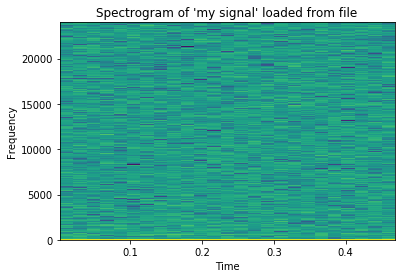

In [36]:
# Plot the spectogram of this data
plt.specgram(dat, NFFT=1024, Fs=file_samp, Fc=0) #,pad_to=1000
plt.title("Spectrogram of 'my signal' loaded from file")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

if you've done this right, you should see a fun surprise here!

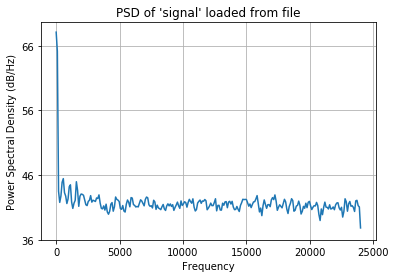

In [37]:
# Let's try a PSD plot of the same data
plt.psd(dat, NFFT=int(1024/2), Fs=file_samp, Fc=0)
plt.title("PSD of 'signal' loaded from file")
plt.show() 

* And let's look at it on the complex plane
* Note that showing *every* data point would be time- and processing-intensive so we'll just show a few

In [17]:
plt.scatter(np.real(dat[0:100000]), np.imag(dat[0:100000]))
plt.title("Constellation of the 'signal' loaded from file")
plt.show() 

* Note that if you load in this file with the wrong data type, or without turning the interleaved data into complex values, you'll see a different spectogram. Try it yourself and see what happens.
* Now let's try some other signal processing operations.

In [34]:
Fs = 1000000 # define sampling rate

* Let's try a frequency translation. For a complex signal, 
* frequency translation is achieved with multiplication by a complex exponential

In [106]:
# To mix the data down, generate a complex exponential 
# with phase -f_shift/Fs
fc = np.exp(-1.0j*2.0*np.pi* 50000/Fs*np.arange(len(dat)))
# Try plotting this complex exponential with a scatter plot of the complex plan - 
# what do you expect it to look like?
y = dat * fc

# How has our PSD changed?

NameError: name 'y' is not defined

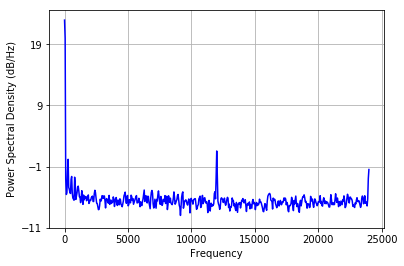

In [42]:
plt.psd(dat, NFFT=1024, Fs=file_samp, color="blue")  # original
plt.psd(y, NFFT=1024, Fs=file_samp, color="green")  # translated
plt.title("PSD of 'signal' loaded from file")
plt.show() 

In [45]:
# What happens when you filter your data with a lowpass filter?
f_bw = int(file_samp/2) # 200k filter for FM 10000 # fileter bandwidth
Fs  = file_samp # sample_rate
n_taps = 12   # taps?
lpf = signal.remez(n_taps, [0, f_bw, f_bw+(Fs/2-f_bw)/4, Fs/2], [1,0], Hz=Fs)

ValueError: Failure to converge after 25 iterations.


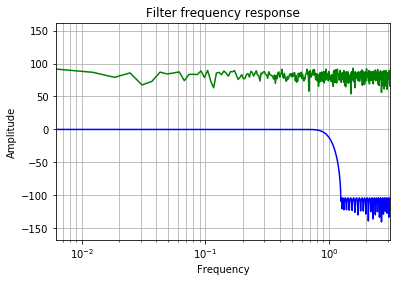

In [41]:
# Plot your filter's frequency response:
w, h = signal.freqz(lpf)
w2, h2 = signal.freqz(dat)
plt.plot(w2, 20 * np.log10(abs(h2)), color="green")
plt.plot(w, 20 * np.log10(abs(h)), color="blue")
plt.xscale('log')
plt.title('Filter frequency response')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()

* The above graph, green is unfiltered, blue is filtered.

In [97]:
y = signal.lfilter(lpf, 1.0, dat)

# How has our PSD changed?

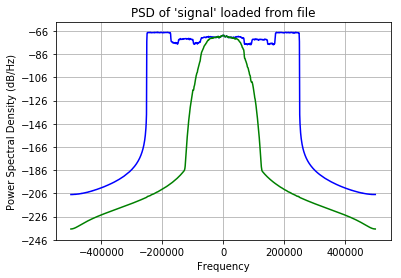

In [98]:
plt.psd(dat, NFFT=1024, Fs=1000000, color="blue")  # original
plt.psd(y, NFFT=1024, Fs=1000000, color="green")  # filtered
plt.title("PSD of 'signal' loaded from file")
plt.show() 

/home/ubuntu/.local/lib/python2.7/site-packages/scipy/signal/filter_design.py:1551: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)
/home/ubuntu/.local/lib/python2.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/ubuntu/.local/lib/python2.7/site-packages/scipy/signal/signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


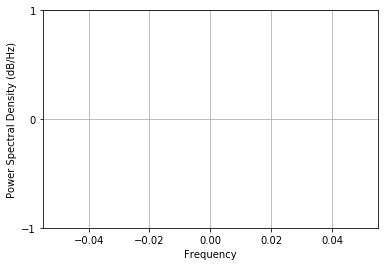

In [99]:
# Let's try decimating following a lowpass filter

# Figure out our best decimation rate
dec_rate = int(Fs / f_bw)
z = signal.decimate(y, dec_rate)
Fs_z = Fs/dec_rate

# New PSD - now with new Fs
plt.psd(z, NFFT=1024, Fs=Fs_z, color="blue")
plt.show() 

# Implementing the FM demodulator (new Section)

We'll use a kind of frequency discriminator called a polar discriminator. A polar discriminator measures the phase difference between consecutive samples of a complex-sampled FM signal. More specifically, it takes successive complex-valued samples and multiplies the new sample by the conjugate of the old sample. Then it takes the angle of this complex value. This turns out to be the instantaneous frequency of the sampled FM signal.

In [62]:
# Given a signal x (in a numpy array)
x = dat
y = x[1:] * np.conj(x[:-1])
#y = dat
z = np.angle(y)

## De-emphasis filter

In [64]:
# The de-emphasis filter
# Given a signal 'x5' (in a numpy array) with sampling rate Fs_y
d = Fs * 75e-6   # Calculate the # of samples to hit the -3dB point
x = np.exp(-1/d)   # Calculate the decay between each sample
b = [1-x]          # Create the filter coefficients
a = [1,-x]
x6 = signal.lfilter(b,a,x5) 

ValueError: selected axis is out of range